In [9]:
%pip install yfinance prophet pandas matplotlib


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 66.3 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 24.1 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.9/863.9 kB 48.2 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.9-cp311-cp311-linux_x86_64.whl size=300870 sha256=8553493a0fdcbb8f4beb6c519ad4366e08f246236f3a31d4257387b6f3936daf
  Stored in directory: /home/zachar33/.cache/pip/wheels/f4/14/e4/50c88c865833085aeb91e2bd40e3a683ff434806386b8ee7bc
Successfully built peewee
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Not

[*********************100%***********************]  1 of 1 completed
22:22:12 - cmdstanpy - INFO - Chain [1] start processing
22:22:12 - cmdstanpy - INFO - Chain [1] done processing


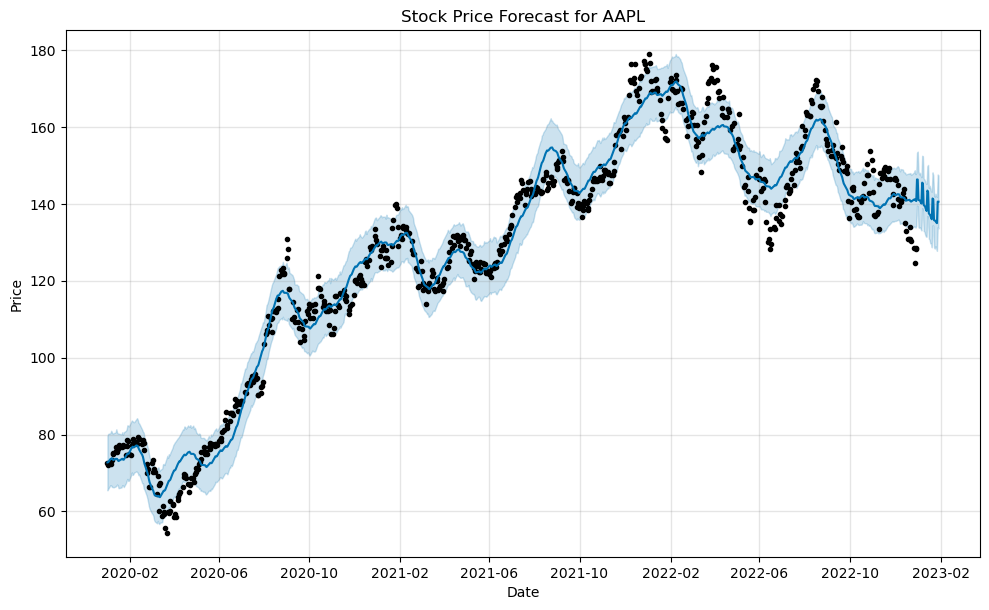

In [11]:
import yfinance as yf
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

df = yf.download("AAPL", start="2020-01-01", end="2023-01-01")[["Close"]].reset_index()
df.columns = ['ds', 'y']

model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

fig = model.plot(forecast)
plt.title("Stock Price Forecast for AAPL")
plt.xlabel("Date")
plt.ylabel("Price")
plt.savefig("forecast_plot.png")